# Librerías

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datos

In [6]:
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

# Kolmogorov Smirnov

El estadístico de la prueba KS se define como:

$$
D = \sup_x | F_n(x) - F(x) |
$$

donde:
- \( F_n(x) \) es la función de distribución empírica (ECDF) de los datos.
- \( F(x) \) es la función de distribución acumulativa de la distribución teórica con la cual estás comparando los datos.
- \( \sup_x \) es la supremum, es decir, el máximo valor de la diferencia absoluta.


In [4]:
ks_stat, p_value = stats.kstest(data, 'norm')
print(f'Estadístico KS: {ks_stat}, Valor p: {p_value}')

Estadístico KS: 0.03737519429804048, Valor p: 0.11930823166569182


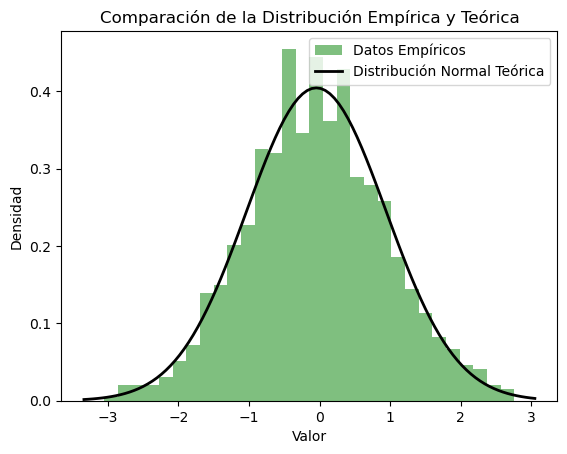

In [3]:
plt.hist(data, bins=30, density=True, alpha=0.5, color='g', label='Datos Empíricos')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(data), np.std(data))
plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal Teórica')
plt.title('Comparación de la Distribución Empírica y Teórica')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Jarque Bera

El estadístico de la prueba Jarque-Bera se define como:

$$
\text{JB} = \frac{n}{6} \left( S^2 + \frac{(K - 3)^2}{4} \right)
$$

donde:
- \( n \) es el número de observaciones en los datos.
- \( S \) es la asimetría (skewness) de los datos.
- \( K \) es la curtosis (kurtosis) de los datos.
- Para una distribución normal, la asimetría \( S \) debe ser 0 y la curtosis \( K \) debe ser 3.


# Anderson Darling

El estadístico de la prueba Anderson-Darling se define como:

$$
A^2 = -n - \frac{1}{n} \sum_{i=1}^{n} \left( (2i-1) \left[ \ln(F(X_i)) + \ln(1 - F(X_{n+1-i})) \right] \right)
$$

donde:
- \( n \) es el número de observaciones en los datos.
- \( X_i \) son los datos ordenados en forma ascendente.
- \( F(X_i) \) es la función de distribución acumulativa de la distribución teórica con la cual estás comparando los datos.


In [16]:
ks_stat, ks_p_value = stats.kstest(data, 'norm')
jb_stat, jb_p_value = stats.jarque_bera(data)
ad_result = stats.anderson(data, dist='norm')
ad_stat = ad_result.statistic
ad_critical_values = ad_result.critical_values
ad_significance_levels = ad_result.significance_level
resultados = {
    'Prueba': ['Kolmogorov-Smirnov', 'Jarque-Bera', 'Anderson-Darling'],
    'Estadístico': [ks_stat, jb_stat, ad_stat],
    'Valor p (o nivel de significancia)': [ks_p_value, jb_p_value, ad_stat],
    "Resultado" : ["Normal", "Normal", "Normal"]
}

import pandas as pd
tabla_resultados = pd.DataFrame(resultados)
tabla_resultados

,Prueba,Estadístico,Valor p (o nivel de significancia),Resultado
0,Kolmogorov-Smirnov,0.037375,0.119308,Normal
1,Jarque-Bera,0.282200,0.868402,Normal
2,Anderson-Darling,0.243218,0.243218,Normal


### **Todas convergen a que los datos generados se comportan acorde a una distribución normal**